## 1.Scala's real-world project repository data

In [4]:
#Importing pandas
import pandas as pd

#Loading in the data
pulls = pd.read_csv(r"C:\Users\senol\PycharmProjects\Data Examples\pull_files.csv\pulls.csv")
pull_files = pd.read_csv(r"C:\Users\senol\PycharmProjects\Data Examples\pull_files.csv\pull_files.csv")

pulls.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [5]:
pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 145.4+ KB


In [6]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


## 2.Cleaning the data

In [7]:
# Convert the date for the pulls object
pulls["date"] = pd.to_datetime(pulls["date"], utc = True)
pulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 145.4+ KB


## 3.Merging the DataFrames
The data extracted comes in two separate files. Merging the two DataFrames will make it easier for us to analyze the data in the future tasks.

In [8]:
#Merge the two DataFrames
data = pulls.merge(pull_files, on = "pid")

data.head()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


## 4.Is the project still actively maintained?



Text(0, 0.5, 'Num pull request')

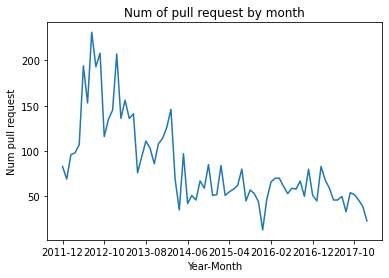

In [11]:
%matplotlib inline

# Create a column that will store the month and the year, as a string
pulls["month_year"] = pulls.apply(lambda x: str(x["date"].year) + "-" + "%02d"% x["date"].month, axis=1)

#Group by month_year and count the pull requests
counts = pulls.groupby("month_year")["pid"].count()

#Plot the ruslts
ax = counts.plot()
ax.set_title("Num of pull request by month")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Num pull request")


## 5.Is there camaraderia in the project ?

Text(0, 0.5, 'Num pull requests')

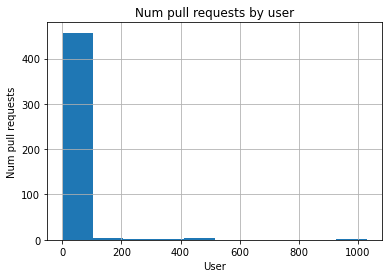

In [13]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = pulls.groupby("user")["pid"].count()

# Plot the histogram
ax = by_user.hist()
ax.set_title("Num pull requests by user")
ax.set_xlabel("User")
ax.set_ylabel("Num pull requests")

## 6.What files were changed in the last ten pull requests

In [15]:
# Identify the last 10 pull requests 
last_10 = pulls.nlargest(10, "date")

# Join the two data sets
joined_pr = last_10.merge(pull_files, on="pid")

# Identify the unique files
files = set(joined_pr["file"].unique())

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7.Who made the most pull requests to a give file

In [17]:
# This is the file we are interested in 
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that change the file
file_pr = data[data["file"] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby("user").count()

#Print the top 3 developers
author_counts.nlargest(3, "pid")


,pid,date,file
user,,,
xeno-by,11,11,11
retronym,5,5,5
soc,4,4,4


## 8.Who made the last te pull requests on a given file

In [19]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that canged the target file
file_pr = pull_files[pull_files["file"] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on = "pid")

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10,"date")["user"])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## 9.The pull requests of two special developers

Text(0, 0.5, 'Pull requests')

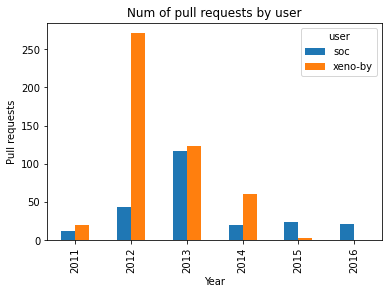

In [22]:
%matplotlib inline

# The developers we are interested in
authors = ["xeno-by","soc"]

# Get all the developers pull requests 
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(["user", by_author["date"].dt.year]).agg({"pid":"count"}).reset_index()

#Convert the table to a wide format
counts_wide = counts.pivot_table(index = "date", columns = "user", values = "pid", fill_value = 0)

#Plot the results
ax = counts_wide.plot(kind = "bar")
ax.set_title("Num of pull requests by user")
ax.set_xlabel("Year")
ax.set_ylabel("Pull requests")

## 10.Visualizing the contributions of each developer

Text(0, 0.5, 'Pull requests')

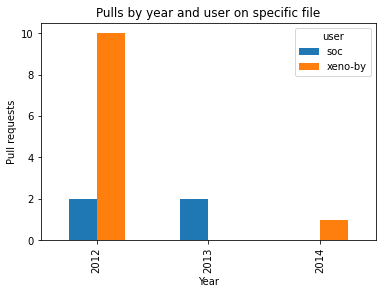

In [23]:
authors = ["xeno-by", "soc"]
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the "data" DataFrame
by_author = data[data["user"].isin(authors)]

#Select the pull requests that affect the file
by_file = by_author[by_author["file"] == file]

#Group and count the number of PRs done by each user each year
grouped = by_file.groupby(["user", by_file["date"].dt.year]).count()["pid"].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index = "date", columns = "user", values = "pid", fill_value=0)

#Plot the result
ax = by_file_wide.plot(kind = "bar")
ax.set_title("Pulls by year and user on specific file")
ax.set_xlabel("Year")
ax.set_ylabel("Pull requests")

